## **Required Libraries**

In [1]:
!pip install sdv diffusers transformers accelerate gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8

## **Generate Synthetic Tabular Data (Structured Data)**

In [2]:
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer
import pandas as pd

# Load a sample dataset (Iris dataset for demo)
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Define Metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)

# Train the synthesizer
synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(df)

# Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=100)
print(synthetic_data.head())


/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                6.2               2.7                6.5               2.0   
1                4.5               3.1                2.0               0.4   
2                6.2               2.3                5.7               0.6   
3                5.2               3.5                2.8               0.6   
4                5.2               2.3                1.6               0.6   

   target  
0       2  
1       0  
2       1  
3       0  
4       2  


### **Generate Synthetic Images (Stable Diffusion on Colab Free GPU)**

In [ ]:
!pip install diffusers transformers accelerate safetensors
!huggingface-cli download stabilityai/stable-diffusion-2 --local-dir /content/sd-model


Streaming output truncated to the last 5000 lines.


diffusion_pytorch_model.fp16.bin:  24% 419M/1.73G [01:17<06:39, 3.29MB/s]





diffusion_pytorch_model.bin:  12% 398M/3.46G [01:17<12:38, 4.04MB/s]


pytorch_model.fp16.bin:  60% 409M/681M [01:18<01:25, 3.20MB/s]



pytorch_model.bin:  28% 377M/1.36G [01:18<05:12, 3.15MB/s]
768-v-ema.safetensors:   9% 472M/5.21G [01:18<13:51, 5.70MB/s]

768-v-ema.ckpt:   9% 461M/5.21G [01:18<16:13, 4.88MB/s]


pytorch_model.fp16.bin:  62% 419M/681M [01:18<00:58, 4.44MB/s]





diffusion_pytorch_model.bin:  12% 409M/3.46G [01:18<09:23, 5.42MB/s]




model.fp16.safetensors:  65% 440M/681M [01:18<00:48, 4.99MB/s]



pytorch_model.bin:  28% 388M/1.36G [01:18<03:48, 4.25MB/s]






diffusion_pytorch_model.fp16.bin:  25% 430M/1.73G [01:22<07:58, 2.72MB/s]

768-v-ema.ckpt:   9% 472M/5.21G [01:24<24:13, 3.26MB/s]



pytorch_model.bin:  29% 398M/1.36G [01:23<05:09, 3.12MB/s]




model.fp16.safetensors:  66% 451M/681M [01:24<01:08, 3.34MB/s]


pytorch_model.fp

In [9]:
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

# Load from local directory to avoid timeouts
model_path = "/content/sd-model"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")  # Move to GPU for speed

# Define prompt
prompt = "A futuristic city with neon lights, cyberpunk style"

# Generate image
image = pipe(prompt).images[0]
image.show()
image.save("generated_image.png")

print("✅ Image generated and saved as 'generated_image.png'")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

✅ Image generated and saved as 'generated_image.png'


In [10]:
from google.colab import files
files.download("generated_image.png")  # Downloads the image to your local device


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/50 [00:00<?, ?it/s]

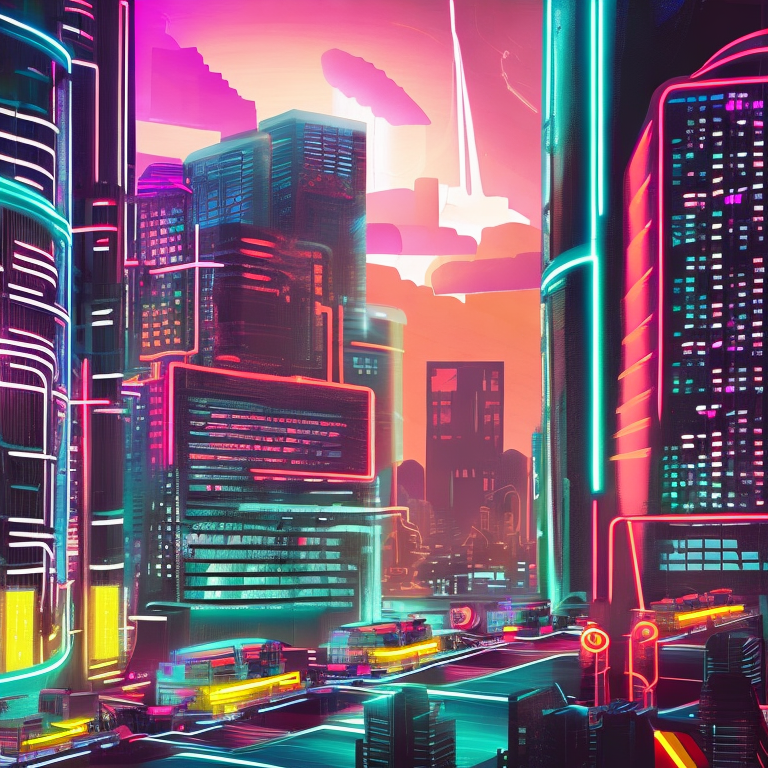

In [11]:
from IPython.display import display
image = pipe(prompt).images[0]
display(image)  # Shows the image in Colab output
image.save("generated_image.png")

### **Generate Synthetic Text Data (LLM)**

In [5]:
from transformers import pipeline

# Load a pre-trained text generator (NO API KEY NEEDED)
text_generator = pipeline("text-generation", model="gpt2")

# Generate synthetic text
prompt = "In the future, AI will transform healthcare by"
generated_text = text_generator(prompt, max_length=50, do_sample=True, truncation=True)[0]['generated_text']

print(generated_text)


Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In the future, AI will transform healthcare by focusing on delivery and care. As the world becomes more connected through smarter data and data analytics, the costs of developing systems for tracking patient care could well rise, which will further influence outcomes of AI.




## **Simple UI with Gradio**

In [6]:
import gradio as gr

def generate_synthetic_data(num_samples):
    synthetic_data = synthesizer.sample(num_rows=int(num_samples))
    return synthetic_data

demo = gr.Interface(
    fn=generate_synthetic_data,
    inputs=gr.Number(label="Number of Samples"),
    outputs="dataframe"
)

demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://de5e67a257bd6f5f14.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
